In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('iris.csv')

In [27]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [28]:
data = data.drop('Id', axis=1)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


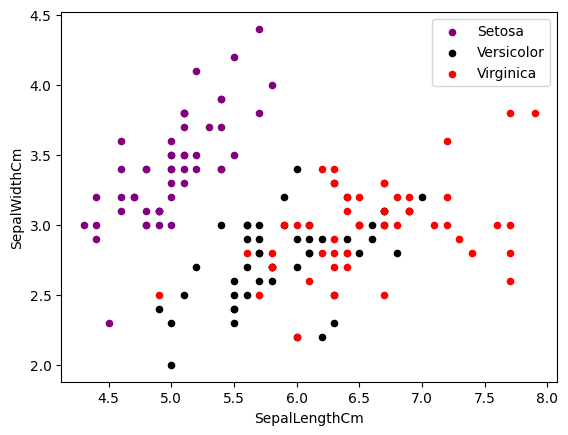

In [30]:
fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', label='Setosa', color='purple')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', label='Versicolor', color='black', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', label='Virginica', color='red', ax=fig)

plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

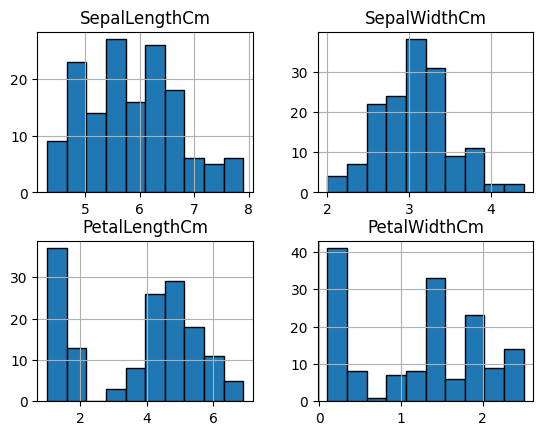

In [31]:
data.hist(edgecolor='black')

In [32]:
#ML PART

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

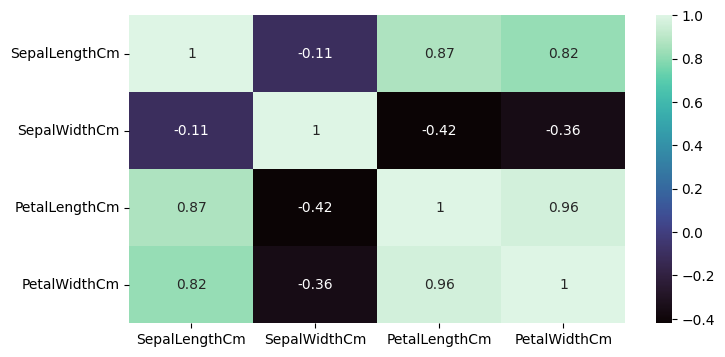

In [34]:
plt.figure(figsize=(8,4))
sns.heatmap(data.drop('Species', axis=1).corr(), annot=True, cmap='mako')
plt.show()

In [35]:
X = data
train, test = train_test_split(data, test_size=0.3, random_state=69)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 57 to 54
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  105 non-null    float64
 1   SepalWidthCm   105 non-null    float64
 2   PetalLengthCm  105 non-null    float64
 3   PetalWidthCm   105 non-null    float64
 4   Species        105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.9+ KB


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 4 to 52
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  45 non-null     float64
 1   SepalWidthCm   45 non-null     float64
 2   PetalLengthCm  45 non-null     float64
 3   PetalWidthCm   45 non-null     float64
 4   Species        45 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [38]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train['Species']

In [39]:
test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [40]:
test_y = test['Species']

In [41]:
model = svm.SVC(random_state=69)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(y_pred, test_y))

0.9777777777777777


In [42]:
model = svm.SVC(kernel='linear', random_state=69)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(y_pred, test_y))

1.0


OMG

In [43]:
model = LogisticRegression(random_state=69)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(y_pred, test_y))

0.9777777777777777


In [44]:
model = DecisionTreeClassifier(random_state=69)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(test_y, y_pred))

0.9555555555555556


In [45]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(test_y, y_pred))

0.9777777777777777


C:\Users\User\AppData\Local\Temp\ipykernel_10700\2868176670.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  neighbors = pd.concat([neighbors, pd.Series(metrics.accuracy_score(y_pred, test_y))])


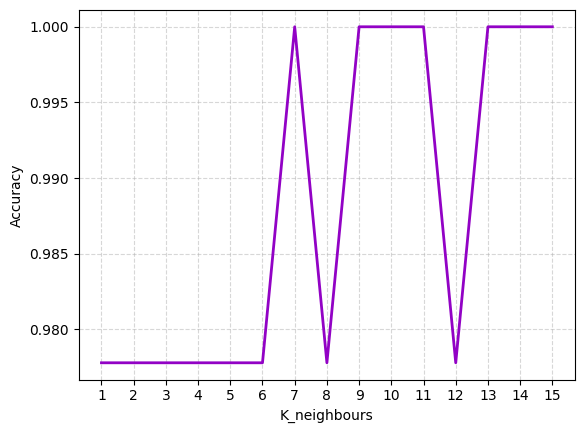

In [46]:
i_neighbors = [i for i in range(1, 16)]
neighbors = pd.Series()
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    neighbors = pd.concat([neighbors, pd.Series(metrics.accuracy_score(y_pred, test_y))])
plt.plot(i_neighbors, neighbors, linewidth=2, color='#9202C5')
plt.xticks(i_neighbors)
plt.xlabel('K_neighbours')
plt.ylabel('Accuracy')
plt.grid(alpha=0.5, linestyle='--')
plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print(metrics.accuracy_score(test_y, y_pred))

0.9777777777777777


OWN K-neighbors

In [48]:
from math import *
def distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i] - x_train[i]) ** 2
    return math.sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(distance(i, x_test))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    classes = [i[-1] for i in neighbors]
    return max(classes, key=classes.count)

In [49]:
def accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i]==y_pred[i]:
            num_correct+=1
    accuracy = num_correct/len(y_true)
    return accuracy

In [50]:
shuffle_index = np.random.permutation(iris.shape[0])
df = iris.iloc[shuffle_index]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)
df.head(5)

NameError: name 'iris' is not defined

In [51]:
train_size = int(df.shape[0]*0.7)
train_df = df.iloc[:train_size,:-1] 
print(train_df)
test_df = df.iloc[train_size:,:]
train = train_df.values
y_true = test_df.iloc[:, -1].values
test_df = df.iloc[train_size:,:]
test_df = df.iloc[train_size:,:-1]
test = test_df.values
print(test_df)


NameError: name 'df' is not defined

In [52]:
y_true

NameError: name 'y_true' is not defined

In [53]:
y_pred = []
for i in test:
    y_pred.append(prediction(i, train, 7))
y_pred

TypeError: unsupported operand type(s) for -: 'str' and 'str'


**********************************************************************
Accuracy of the model is :  1.0
Accuracy (sklearn): 1.0000
RMSE value = 0.00
R2 Score= 1.00
**********************************************************************
Confusion matrix of classifier : 
 [[23  0  0]
 [ 0 12  0]
 [ 0  0 10]]




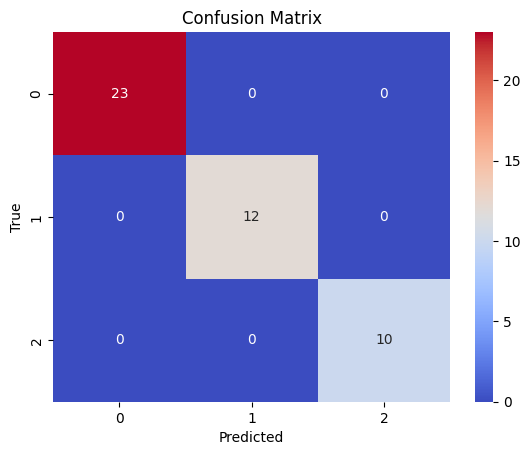

**********************************************************************
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

**********************************************************************


In [89]:
iris = pd.read_csv('Iris.csv')
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report


def distance(sample1, sample2):
    data_sq = 0
    for i in range(len(sample1)):
        data_sq += (sample1[i] - sample2[i]) ** 2
    return math.sqrt(data_sq)


def get_neighbors(x_test_sample_features, x_train_full_data, num_neighbors):
    distances = []
    for with_label in x_train_full_data:
        train_features = with_label[:-1]
        distances.append((distance(x_test_sample_features, train_features), with_label))
    distances.sort(key=lambda x: x[0])
    return [item[1] for item in distances[:num_neighbors]]


def prediction(x_test_sample_features, x_train_full_data, num_neighbors):
    neighbors_full_rows = get_neighbors(x_test_sample_features, x_train_full_data, num_neighbors)
    classes = [row[-1] for row in neighbors_full_rows]
    return max(classes, key=classes.count)

def accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            num_correct += 1
    return num_correct / len(y_true)


shuffle_index = np.random.permutation(iris.shape[0])
df = iris.iloc[shuffle_index].copy() 

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

train_size = int(df.shape[0] * 0.7)

train_df_full = df.iloc[:train_size, :]
train_full = train_df_full.values

test_df_features = df.iloc[train_size:, :-1]
test_features = test_df_features.values

y_true = df.iloc[train_size:, -1].values
y_pred = []
for test_sample_features in test_features:
    y_pred.append(prediction(test_sample_features, train_full, 3))
y_pred = np.array(y_pred)
print("\n"+"*******"*10)
acc = accuracy(y_true, y_pred) 
print("Accuracy of the model is : ", acc)

print(f"Accuracy (sklearn): {accuracy_score(y_true, y_pred):.4f}")

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE value = %.2f" % rmse)
print("R2 Score= %.2f" % r2_score(y_true, y_pred))
print("*******"*10)


cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix of classifier : \n", cm)
print("\n")
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("*******"*10)
target_names_map = le.inverse_transform(np.unique(df['Species']))
print(classification_report(y_true, y_pred, target_names=target_names_map))
print("*******"*10)